In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


In [2]:
# Load the data into a pandas DataFrame using 'ISO-8859-1' encoding
youtube_data = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
youtube_data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
# Basic statistics
num_unique_youtubers = youtube_data['Youtuber'].nunique()
avg_subscribers = youtube_data['subscribers'].mean()
avg_video_views = youtube_data['video views'].mean()

# Most common categories
common_categories = youtube_data['category'].value_counts()

# Distribution of channels by country
channel_country_distribution = youtube_data['Country'].value_counts()

# Check for missing values
missing_values = youtube_data.isnull().sum()

num_unique_youtubers, avg_subscribers, avg_video_views, common_categories, channel_country_distribution, missing_values


(995,
 22982412.06030151,
 11039537052.03819,
 Entertainment            241
 Music                    202
 People & Blogs           132
 Gaming                    94
 Comedy                    69
 Film & Animation          46
 Education                 45
 Howto & Style             40
 News & Politics           26
 Science & Technology      17
 Shows                     13
 Sports                    11
 Pets & Animals             4
 Trailers                   2
 Nonprofits & Activism      2
 Movies                     2
 Autos & Vehicles           2
 Travel & Events            1
 Name: category, dtype: int64,
 United States           313
 India                   168
 Brazil                   62
 United Kingdom           43
 Mexico                   33
 Indonesia                28
 Spain                    22
 Thailand                 18
 South Korea              17
 Russia                   16
 Canada                   15
 Argentina                13
 Philippines              12
 Colom

In [4]:
# Select numerical columns for correlation analysis
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']

# Calculate correlation matrix
correlation_matrix = youtube_data[numerical_cols].corr()

correlation_matrix


,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,video_views_for_the_last_30_days,subscribers_for_last_30_days
subscribers,1.000000,0.750958,0.077136,0.388941,0.388579,0.389072,0.388935,0.278846,0.309527
video views,0.750958,1.000000,0.165928,0.552096,0.551455,0.552776,0.552091,0.361856,0.187384
uploads,0.077136,0.165928,1.000000,0.166922,0.167283,0.167745,0.166904,0.101521,0.008933
lowest_monthly_earnings,0.388941,0.552096,0.166922,1.000000,0.999955,0.999942,0.999998,0.680330,0.679360
highest_monthly_earnings,0.388579,0.551455,0.167283,0.999955,1.000000,0.999884,0.999953,0.680289,0.679699
lowest_yearly_earnings,0.389072,0.552776,0.167745,0.999942,0.999884,1.000000,0.999941,0.680278,0.678394
highest_yearly_earnings,0.388935,0.552091,0.166904,0.999998,0.999953,0.999941,1.000000,0.680330,0.679380
video_views_for_the_last_30_days,0.278846,0.361856,0.101521,0.680330,0.680289,0.680278,0.680330,1.000000,0.451523
subscribers_for_last_30_days,0.309527,0.187384,0.008933,0.679360,0.679699,0.678394,0.679380,0.451523,1.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


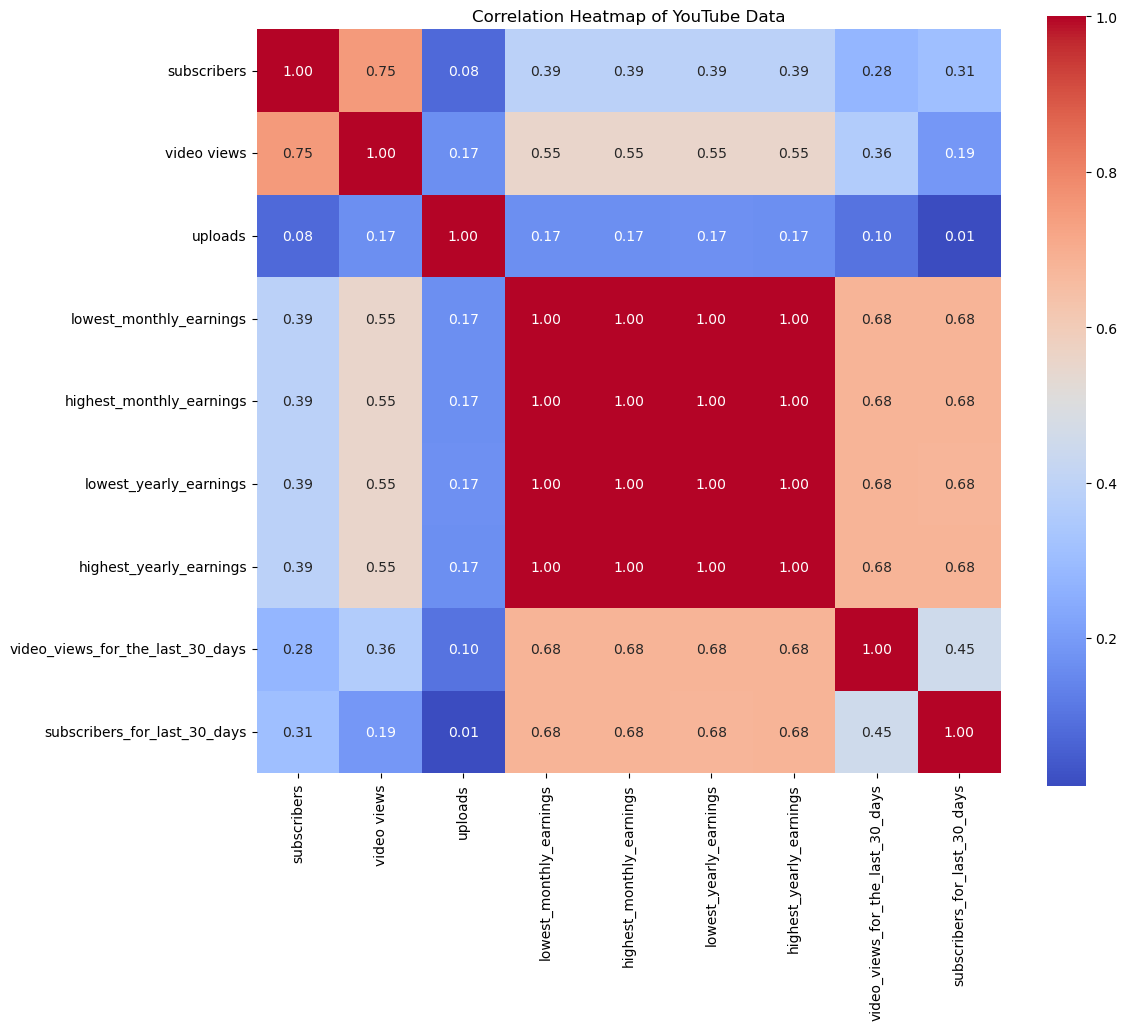

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title
plt.title('Correlation Heatmap of YouTube Data')

plt.show()


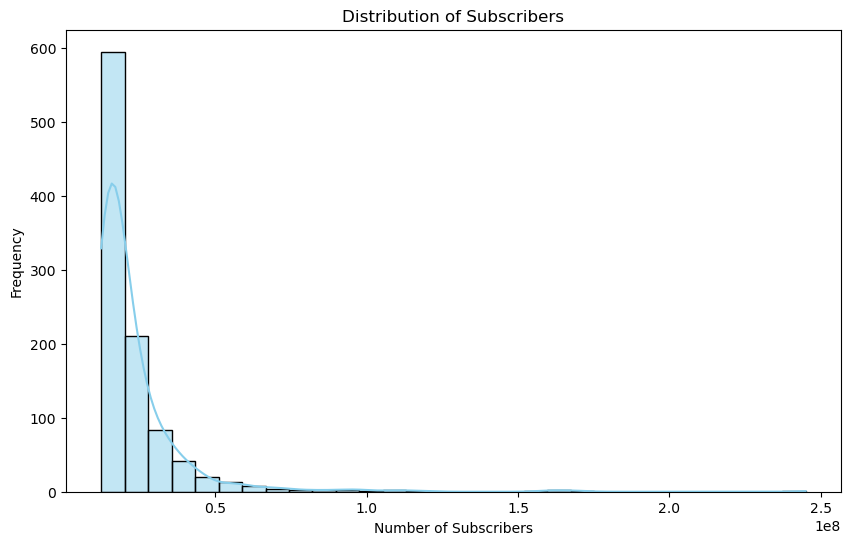

In [6]:
# Plot size
plt.figure(figsize=(10, 6))

# Create a histogram for subscribers
sns.histplot(youtube_data['subscribers'], bins=30, color='skyblue', kde=True)

# Title and labels
plt.title('Distribution of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')

plt.show()
